In [1]:
import os
os.getcwd()

'/Users/jpgard/Documents/github/dro/notebooks'

In [2]:
import pandas as pd
fp = "../embeddings/embedding.csv"
embeddings = pd.read_csv(fp)
print(embeddings.shape)

(17543, 513)


In [14]:

def get_image(i, embeddings=embeddings, dir="/Users/jpgard/Documents/research/vggface2/train"):
    # fetch the image at index i along axis-0 of embeddings
    fp = embeddings.iloc[i,0]
    print(fp)

/projects/grail/jpgard/vggface2/train_partitioned_by_label/male_large/0/n005935/0002_01.jpg


In [11]:
# take the first image and find its most similar
from sklearn.metrics.pairwise import cosine_similarity
similarities = cosine_similarity(embeddings.iloc[:,1:].values)

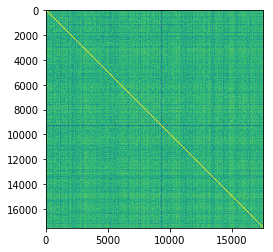

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(similarities)

In [ ]:
import random
random.seed(2974)
i = random.randint(0, embeddings.shape[0])
plt.imshow